<a href="https://colab.research.google.com/github/Noor-Z1/Machine-Learning/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np


class KMeans:
    def __init__(self, dataset, K=2):
        """
        :param dataset: 2D numpy array, the whole dataset to be clustered
        :param K: integer, the number of clusters to form
        """
        self.K = K
        self.dataset = np.array(dataset)
        # each cluster is represented with an integer index
        # self.clusters stores the data points of each cluster in a dictionary
        self.clusters = {i: [] for i in range(K)}
        # self.cluster_centers stores the cluster mean vectors for each cluster in a dictionary
        self.cluster_centers = {i: None for i in range(K)}
        # you are free to add further variables and functions to the class



    def init_centroids(self):
      instances, dim = self.dataset.shape

      #choosing k centroids randomly to be one of the datapoints
      for i in range(self.K):
          self.cluster_centers[i] =  self.dataset[ np.random.choice(instances, size=1, replace = False)]


    def assign_to_cluster(self):
       class_label = []

       instances, dim = self.dataset.shape


       for i in range(instances):
           distances_array = []

           #distances array will contain the distance between each a data instance and each centroid.
           for j in range(self.K):
             data_cluster_dist =  np.linalg.norm(  self.dataset[i] - self.cluster_centers[j] )
             distances_array.append(data_cluster_dist)

           #cluster label of this instance is the index of the min distance cluster
           predicted_class = np.argmin(distances_array)
           class_label.append(predicted_class)


       #print(class_label)
       #print(self.dataset)
       #print(self.dataset[0])

       #storing the datapoints that are in each cluster in a dictionary
       for i in range(instances):
         for j in range(self.K):
           if class_label[i] == j:
             self.clusters[j].append(self.dataset[i])


       return class_label

    def find_centroids(self):

      #new centroid/cluster centre is the mean of all the points inside the cluster
      #since data instances are rows, mean is taken along axis 0

      for k in range(self.K):
        self.cluster_centers[k] =  np.mean(np.array(self.clusters[k]), axis = 0)


    #recheck
    def calculateLoss(self, labels):


       instances, dim = self.dataset.shape
       loss=0

       for i in range(instances):
          for k in range(self.K):
              if labels[i] == k:
                cons = 1
              else:
                 cons =0

              loss+= cons* (np.linalg.norm(np.subtract(self.dataset[i],self.cluster_centers[k])))**2

       return loss


    def run(self):
        """Kmeans algorithm implementation"""

        iter = 10    # as sepeicified in the assignment

        #the algo for a particular k value
        loss = []

        for i in range(iter):
          model.init_centroids()
          model.assign_to_cluster()
          model.find_centroids()
          model.assign_to_cluster()
          for k in range(7):   # for alg to converge
            model.find_centroids()
            label = model.assign_to_cluster()

          l = model.calculateLoss(label)
          loss.append(l)


        #print(loss)
        #print(np.mean(np.array(loss)))
        return self.cluster_centers, self.clusters, np.min(np.array(loss))





[134.8296896481946, 141.5849749115798, 144.38410594039715, 143.89459266147227, 139.74193724380862, 136.94433271007537, 136.06760682249796, 135.7127087965785, 134.6595128778817, 134.03246357487242]
138.18519251873585
[133.67261355256903, 134.2511819493686, 134.28608956167048, 133.98928911244386, 134.54566471680215, 134.24925876480825, 133.8589216965319, 133.53147893292618, 133.6838965974555, 133.4725393612165]
133.95409342457924
[133.60601906657706, 133.3471153105475, 133.61172083720896, 133.92925327604252, 133.93486901269472, 134.23155721725814, 134.10207772103033, 133.86248577136433, 133.64728513576722, 133.51191181839042]
133.7784295166881
[133.72348442736683, 133.55819728277447, 133.38974429726156, 133.67726525353316, 133.900341186125, 133.84193626991254, 133.6737433273693, 133.5186599564263, 133.37965983877592, 133.54238219410453]
133.62054140336494
[133.4930080572245, 133.72832868202272, 133.66760853525216, 133.61377017790304, 133.75703949670725, 133.88970200921537, 134.1055804323

'\nmodel.init_centroids()\nmodel.assign_to_cluster()\nprint(model.calculateLoss())\n\n\ncolor = {0 : \'blue\', 1 :\'orange\', 2 : \'green\', 3: "pink", 4: "purple"}\n\n\nfor i in range(model.K):\n   for k in range(len(model.clusters[i])):\n      plot.scatter(model.clusters[i][k][0], model.clusters[i][k][1], c = color[i])\n   plot.scatter(model.cluster_centers[i][0][0],model.cluster_centers[i][0][1],s=300,c=\'yellow\')\n\n   plot.pause(3)\nfor a in range(10):  \n  model.find_centroids()\n\n  model.assign_to_cluster()\n  print(model.calculateLoss())\n\n  for i in range(model.K):\n     for k in range(len(model.clusters[i])):\n      plot.scatter(model.clusters[i][k][0], model.clusters[i][k][1], c = color[i])\n    \n     plot.scatter(model.cluster_centers[i][0],model.cluster_centers[i][1],s=300,c=\'yellow\')\n  plot.pause(3)\n\n\n  '

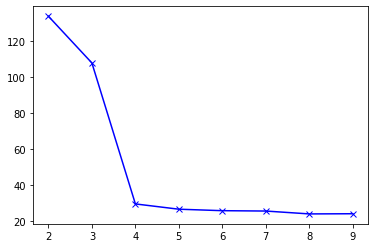

In [ ]:
import pickle
import matplotlib.pyplot as plot
import numpy as np


dataset1 = pickle.load(open("part2_dataset_1.data", "rb"))
dataset2 = pickle.load(open("part2_dataset_2.data", "rb"))



#plot.scatter(dataset1[:,0], dataset1[:,1])

#testing

alpha = []

for K in range(2,10):
  loss = []
  model = KMeans(dataset2, K)
  for iter in range(10):
    _, _, l = model.run()
    loss.append(l)
  alpha.append(np.mean(np.array(loss)))


print(alpha)
k = range(2,10)

plot.plot(k , alpha, 'bx-')





"""
model.init_centroids()
model.assign_to_cluster()
print(model.calculateLoss())


color = {0 : 'blue', 1 :'orange', 2 : 'green', 3: "pink", 4: "purple"}


for i in range(model.K):
   for k in range(len(model.clusters[i])):
      plot.scatter(model.clusters[i][k][0], model.clusters[i][k][1], c = color[i])
   plot.scatter(model.cluster_centers[i][0][0],model.cluster_centers[i][0][1],s=300,c='yellow')

   plot.pause(3)
for a in range(10):
  model.find_centroids()

  model.assign_to_cluster()
  print(model.calculateLoss())

  for i in range(model.K):
     for k in range(len(model.clusters[i])):
      plot.scatter(model.clusters[i][k][0], model.clusters[i][k][1], c = color[i])

     plot.scatter(model.cluster_centers[i][0],model.cluster_centers[i][1],s=300,c='yellow')
  plot.pause(3)


  """

[235.68532799585617, 232.11666151498338, 196.82784099519267, 186.16058595867298, 179.16325111283751, 175.10214166529812, 174.31408184922714, 173.20572703147724, 172.02605740212326, 170.89461739332557]
189.5496292918994
[170.22548793921064, 169.2974116411036, 168.2492712444384, 168.17667374368716, 168.2112419921077, 168.013539545244, 167.85665224251235, 167.48914927047784, 167.1725089049701, 167.21750882479267]
168.19094453485445
[167.11797796028188, 166.6881991362142, 166.6820954253402, 166.2900063959696, 165.99689169814292, 166.07574090114719, 165.91751774874785, 165.99180197747316, 165.76972074379864, 165.5787479161165]
166.21086999032323
[165.52462742491645, 165.5098502533698, 165.46750124771063, 165.35373819644727, 165.1139621891424, 164.9191115530673, 164.7141375004972, 164.735663336677, 164.798780287636, 164.85566101183474]
165.09930330012986
[164.69279655705384, 164.51203332444481, 164.3898051199436, 164.29041499730195, 164.3014871345437, 164.3103410884998, 164.37251754123224, 1

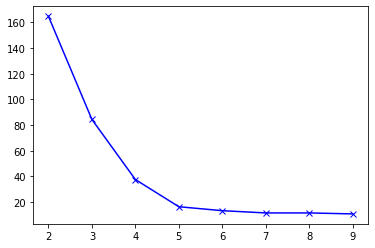

In [ ]:
#K means loss for dataset1

alpha = []

for K in range(2,10):
  loss = []
  model = KMeans(dataset1, K)
  for iter in range(10):
    _, _, l = model.run()
    loss.append(l)
  alpha.append(np.mean(np.array(loss)))


print(alpha)
k = range(2,10)

plot.plot(k , alpha, 'bx-')







K means ++ below:


In [ ]:

import numpy as np
import math



class KMeansPlusPlus:
    def __init__(self, dataset, K=2):
        """
        :param dataset: 2D numpy array, the whole dataset to be clustered
        :param K: integer, the number of clusters to form
        """
        self.K = K
        self.dataset = np.array(dataset)
        # each cluster is represented with an integer index
        # self.clusters stores the data points of each cluster in a dictionary
        self.clusters = {i: [] for i in range(K)}
        # self.cluster_centers stores the cluster mean vectors for each cluster in a dictionary
        self.cluster_centers = {i: None for i in range(K)}
        # you are free to add further variables and functions to the class


    @staticmethod
    def dist(a,b):
       return np.sqrt(sum(np.square(a-b)))

    def init_centroids(self):

      instances, dim = self.dataset.shape

      self.cluster_centers[0] =  np.array(self.dataset[np.random.choice(instances, size=1, replace = False ) ])

      dis = []
      for i in range(instances):
            distance_point_cluster = self.dist(self.dataset[i], np.array(self.cluster_centers[0][0] ))
            dis.append(distance_point_cluster)

      self.cluster_centers[1] = self.dataset[np.argmax(dis)]
      assigned=2

      #print("impppp")
      #print(self.cluster_centers[0])
      #print(self.cluster_centers[1])
      #print(self.clusters)


      self.assign_to_cluster(assigned)


      for i in range(2,self.K):
         dis = []
         max_dist = []

         #print("----")
         #print(len(self.clusters[0]))
         #print(len(self.clusters[1]))

         k=0
         while k < assigned and assigned!= self.K :
            #print(k)
            #print(self.clusters[k])
            #print(self.cluster_centers)
            #print(np.array(self.clusters[k]) - np.array(self.cluster_centers[k]))
            #print(np.linalg.norm(np.array(self.clusters[k]) - np.array(self.cluster_centers[k] ), axis=1 ))


            max = np.argmax(  np.linalg.norm((np.array(self.clusters[k]) - np.array(self.cluster_centers[k])), axis=1 ))
            max_dist.append(np.max(np.linalg.norm((np.array(self.clusters[k]) - np.array(self.cluster_centers[k])), axis=1 )))
            max_instance = self.clusters[k][max]

            dis.append(max_instance)
            k= k+1

         #print("")
         #print(dis)
         #print(max_dist)
         self.cluster_centers[i]=   dis[np.argmax(max_dist)]
         assigned = assigned +1
         self.assign_to_cluster(assigned)



    def assign_to_cluster(self, assigned):
       class_label = []

       instances, dim = self.dataset.shape
       self.clusters = {i: [] for i in range(self.K)}


       for i in range(instances):

           distances_array = []

           for j in range(assigned):
             data_cluster_dist =  np.linalg.norm(  self.dataset[i] - self.cluster_centers[j] )
             distances_array.append(data_cluster_dist)


           predicted_class = np.argmin(distances_array)
           class_label.append(predicted_class)



       for i in range(instances):
         for j in range(self.K):
           if class_label[i] == j:
             self.clusters[j].append(self.dataset[i])

       return class_label


    def find_centroids(self):

       for k in range(self.K):
          self.cluster_centers[k] =  np.mean(np.array(self.clusters[k]), axis = 0)

    def calculateLoss(self, labels):
       instances, dim = self.dataset.shape

       loss=0

       for i in range(instances):
          for k in range(self.K):
              if labels[i] == k:
                cons = 1
              else:
                 cons =0
              loss+= cons* (np.linalg.norm(self.dataset[i] - self.cluster_centers[k]))**2

       return loss


    def run(self):

        iter = 10    # as sepeicified in the assignment

        #the algo for a particular k value
        loss = []

        for i in range(iter):
          model.init_centroids()
          model.find_centroids()
          label = model.assign_to_cluster(self.K)
          l = model.calculateLoss(label)
          loss.append(l)



        return self.cluster_centers, self.clusters, np.min(np.array(loss))




Loss for dataset1
[159.3865009858256, 73.51275796799877, 33.970234234884316, 10.905911295583998, 10.103863746202517, 9.441661461170327, 8.783623871291535, 8.104055205681082]


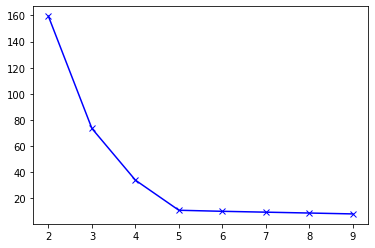

Loss for dataset2
[130.6937810261852, 51.0264480278929, 23.652431207690906, 22.861751390416014, 22.059095597272485, 21.218005554573587, 20.571267921733465, 19.96883533980083]


'\nmodel = KMeansPlusPlus(dataset1, 5)\n\nmodel.init_centroids()\n\n\n\n\nprint(model.cluster_centers)\n\ncolor = {0 : \'blue\', 1 :\'orange\', 2 : \'green\', 3: "pink", 4: "purple" ,5: "red"}\n\n\n\nfor i in range(model.K):\n   for k in range(len(model.clusters[i])):\n      plot.scatter(model.clusters[i][k][0], model.clusters[i][k][1], c = color[i])\n   if(i==0):   \n    plot.scatter(model.cluster_centers[i][0][0],model.cluster_centers[i][0][1],s=300,c=\'yellow\')\n   else:\n      plot.scatter(model.cluster_centers[i][0],model.cluster_centers[i][1],s=300,c=\'yellow\')\n\n#find and fix error in\n#print(model.calculateLoss())\n\n\n#print(model.cluster_centers)\nplot.pause(3)\n\nfor a in range(10):  \n  model.find_centroids()\n\n  model.assign_to_cluster(6)\n \n\n  for i in range(model.K):\n     for k in range(len(model.clusters[i])):\n      plot.scatter(model.clusters[i][k][0], model.clusters[i][k][1], c = color[i])\n    \n     plot.scatter(model.cluster_centers[i][0],model.cluster_cent

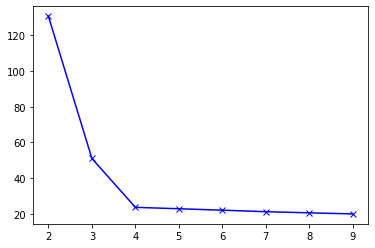

In [ ]:
import pickle
import matplotlib.pyplot as plot
import numpy as np


dataset1 = pickle.load(open("part2_dataset_1.data", "rb"))
dataset2 = pickle.load(open("part2_dataset_2.data", "rb"))


#plot.scatter(dataset1[:,0], dataset1[:,1])


#testing

alpha = []



print("Loss for dataset1")
for K in range(2,10):
  loss = []
  model = KMeansPlusPlus(dataset1, K)
  for iter in range(10):
    _, _, l = model.run()
    loss.append(l)
  alpha.append(np.mean(np.array(loss)) )


print(alpha)
k = range(2,10)

plot.plot(k , alpha, 'bx-')


plot.pause(5)

alpha = []
print("Loss for dataset2")


for K in range(2,10):
  loss = []
  model = KMeansPlusPlus(dataset2, K)
  for iter in range(10):
    _, _, l = model.run()
    loss.append(l)
  alpha.append(np.mean(np.array(loss)) )


print(alpha)
k = range(2,10)
plot.plot(k , alpha, 'bx-')



"""
model = KMeansPlusPlus(dataset1, 5)

model.init_centroids()




print(model.cluster_centers)

color = {0 : 'blue', 1 :'orange', 2 : 'green', 3: "pink", 4: "purple" ,5: "red"}



for i in range(model.K):
   for k in range(len(model.clusters[i])):
      plot.scatter(model.clusters[i][k][0], model.clusters[i][k][1], c = color[i])
   if(i==0):
    plot.scatter(model.cluster_centers[i][0][0],model.cluster_centers[i][0][1],s=300,c='yellow')
   else:
      plot.scatter(model.cluster_centers[i][0],model.cluster_centers[i][1],s=300,c='yellow')

#find and fix error in
#print(model.calculateLoss())


#print(model.cluster_centers)
plot.pause(3)

for a in range(10):
  model.find_centroids()

  model.assign_to_cluster(6)


  for i in range(model.K):
     for k in range(len(model.clusters[i])):
      plot.scatter(model.clusters[i][k][0], model.clusters[i][k][1], c = color[i])

     plot.scatter(model.cluster_centers[i][0],model.cluster_centers[i][1],s=300,c='yellow')
  plot.pause(3)

"""

